Name - Aditya Kothari

Roll no. - I028

Batch - B1

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [91]:
df = pd.read_csv('/content/drive/MyDrive/NSE-TATAGLOBAL7fc6cd37305302a467bfdd22d3efc8c6af173b47b966962b93b4f9366519ce8e.csv')

In [92]:
df.shape

(2035, 8)

In [93]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [94]:
train_data = df.iloc[:,1:2]

In [95]:
train_data.shape

(2035, 1)

In [96]:
train_data.head

<bound method NDFrame.head of         Open
0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
...      ...
2030  117.60
2031  120.10
2032  121.80
2033  120.30
2034  122.10

[2035 rows x 1 columns]>

In [97]:
train_data = train_data.values

In [98]:
scale = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scale.fit_transform(train_data)

In [99]:
x_train = []
y_train = []

for i in range(60,2035):
  x_train.append(train_data_scaled[i-60:i,0])
  y_train.append(train_data_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [100]:
x_train.shape

(1975, 60)

In [101]:
y_train.shape

(1975,)

In [102]:
train_data

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [103]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [104]:
x_train.shape

(1975, 60, 1)

In [105]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

In [106]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [107]:
df2 = pd.read_csv('/content/drive/MyDrive/tatatestb699be02494b453e3166b61e2979b902f69a2521c69023e0efc117661779199d.csv')

In [108]:
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,24-10-2018,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,23-10-2018,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,22-10-2018,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,19-10-2018,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,17-10-2018,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [109]:
test_data = df2.iloc[:,1:2]
test_data.shape

(16, 1)

In [110]:
test_data.head

<bound method NDFrame.head of       Open
0   220.10
1   221.10
2   229.45
3   230.30
4   237.70
5   237.10
6   229.70
7   226.25
8   215.00
9   215.00
10  215.50
11  208.00
12  217.00
13  223.50
14  230.00
15  234.55>

In [111]:
dfx = pd.read_csv('/content/drive/MyDrive/NSE-TATAGLOBAL7fc6cd37305302a467bfdd22d3efc8c6af173b47b966962b93b4f9366519ce8e.csv')
train_data1 = dfx.iloc[:,1:2]
train_data1 = pd.DataFrame(train_data1)
train_data1.shape
test_data = pd.DataFrame(test_data)
det = test_data.append(train_data1)

<ipython-input-111-1d44ebca23db>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  det = test_data.append(train_data1)


In [112]:
det.shape

(2051, 1)

In [113]:
det = det.values

In [114]:
test_data_scaled = scale.fit_transform(det)

In [115]:
test_data_scaled.shape

(2051, 1)

In [116]:
x_test = []
y_test = []

for i in range(60,2035):
  x_test.append(test_data_scaled[i-60:i,0])
  y_test.append(test_data_scaled[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)

In [117]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [118]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 50, validation_data = (x_test,y_test),verbose =1)

Epoch 1/50
62/62 [==============================] - 16s 179ms/step - loss: 0.0301 - accuracy: 5.0633e-04 - val_loss: 0.0225 - val_accuracy: 5.0633e-04
Epoch 2/50
62/62 [==============================] - 8s 124ms/step - loss: 0.0200 - accuracy: 5.0633e-04 - val_loss: 0.0162 - val_accuracy: 5.0633e-04
Epoch 3/50
62/62 [==============================] - 8s 122ms/step - loss: 0.0136 - accuracy: 5.0633e-04 - val_loss: 0.0104 - val_accuracy: 0.0010
Epoch 4/50
62/62 [==============================] - 9s 140ms/step - loss: 0.0085 - accuracy: 0.0010 - val_loss: 0.0061 - val_accuracy: 0.0010
Epoch 5/50
62/62 [==============================] - 8s 132ms/step - loss: 0.0053 - accuracy: 0.0010 - val_loss: 0.0036 - val_accuracy: 0.0010
Epoch 6/50
62/62 [==============================] - 9s 142ms/step - loss: 0.0039 - accuracy: 0.0010 - val_loss: 0.0025 - val_accuracy: 0.0010
Epoch 7/50
62/62 [==============================] - 8s 130ms/step - loss: 0.0031 - accuracy: 0.0010 - val_loss: 0.0021 - val_ac

In [123]:
ynew = model.predict(x_test)

62/62 [==============================] - 2s 38ms/step


In [124]:
test_inverse_predicted = scale.inverse_transform(ynew)

In [125]:
slic_data = pd.concat([df.iloc[60:2035,1:2].copy(),pd.DataFrame(test_inverse_predicted, columns = ['open_predicted'],index = df.iloc[60:2035,1:2].index)],axis=1)
slic_data.head()

,Open,open_predicted
60,271.0,234.130890
61,262.7,234.474213
62,263.0,234.811279
63,265.1,235.088135
64,264.8,235.314865


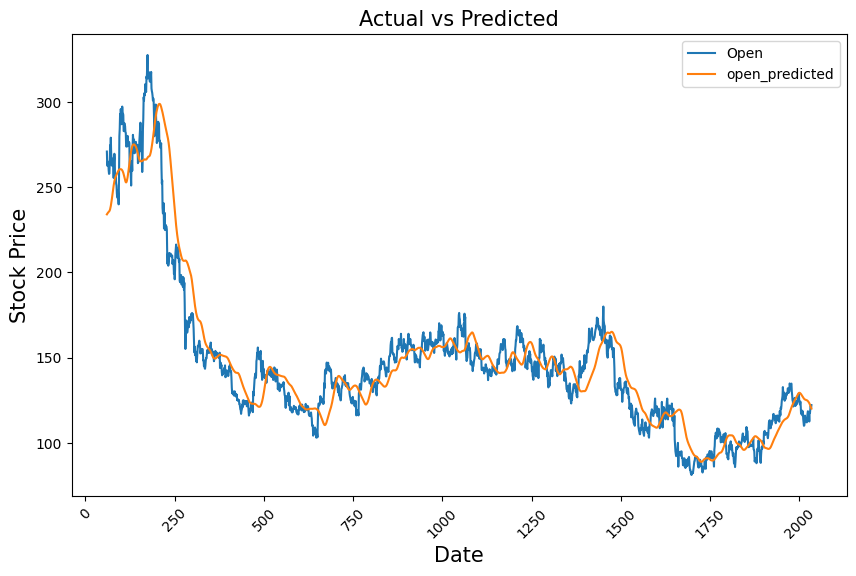

In [126]:
slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title("Actual vs Predicted",size=15)
plt.show()